<a href="https://colab.research.google.com/github/balaajhi/One-step-at-a-time/blob/main/Simple_Moving_Average_AMZN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting the Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
%pip install yfinance


Using Yahoo finance to retrive data

In [ ]:
import datetime as dt
import yfinance as yf
import pandas as pd

stocks = ["AMZN","MSFT","INTC","GOOG","INFY.NS","3988.HK"]
start = dt.datetime.today()-dt.timedelta(6000)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock
ohlcv_data = {} # empty dictionary which will be filled with ohlcv dataframe for each ticker

# looping over tickers and creating a dataframe with close prices
for ticker in stocks:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    

# looping over tickers and storing OHLCV dataframe in dictionary
for ticker in stocks:
    ohlcv_data[ticker] = yf.download(ticker,start,end)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df = cl_price.iloc[: , :1]
df

,AMZN
Date,
2005-08-29,42.790001
2005-08-30,42.490002
2005-08-31,42.700001
2005-09-01,41.840000
2005-09-02,41.509998
...,...
2022-01-24,2890.879883
2022-01-25,2799.719971
2022-01-26,2777.449951


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4134 entries, 2005-08-29 to 2022-01-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    4134 non-null   float64
dtypes: float64(1)
memory usage: 64.6 KB


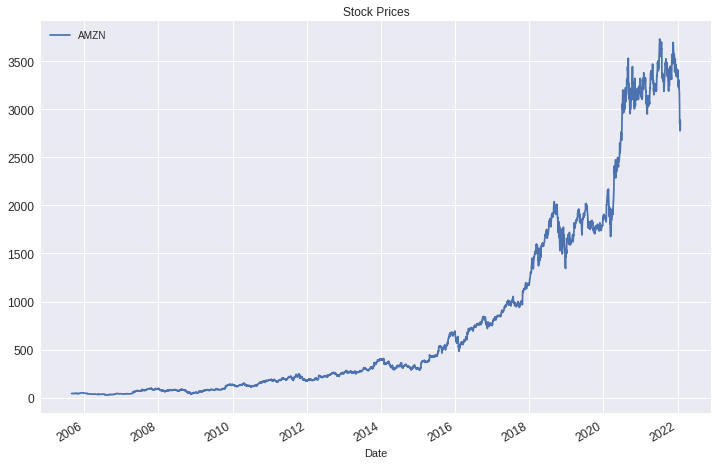

In [ ]:
df.plot(figsize = (12, 8), title = "Stock Prices", fontsize = 12)
plt.show()

In [ ]:
df["returns"] = np.log(df.div(df.shift(1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,AMZN,returns
Date,,
2005-08-29,42.790001,NaN
2005-08-30,42.490002,-0.007036
2005-08-31,42.700001,0.004930
2005-09-01,41.840000,-0.020346
2005-09-02,41.509998,-0.007919
...,...,...
2022-01-24,2890.879883,0.013239
2022-01-25,2799.719971,-0.032042
2022-01-26,2777.449951,-0.007986


## A simple Buy and Hold "Strategy"

In [ ]:
df.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,AMZN,returns
Date,,
2005-08-30,42.490002,-0.007036
2005-08-31,42.700001,0.004930
2005-09-01,41.840000,-0.020346
2005-09-02,41.509998,-0.007919
2005-09-06,43.619999,0.049581
...,...,...
2022-01-24,2890.879883,0.013239
2022-01-25,2799.719971,-0.032042
2022-01-26,2777.449951,-0.007986


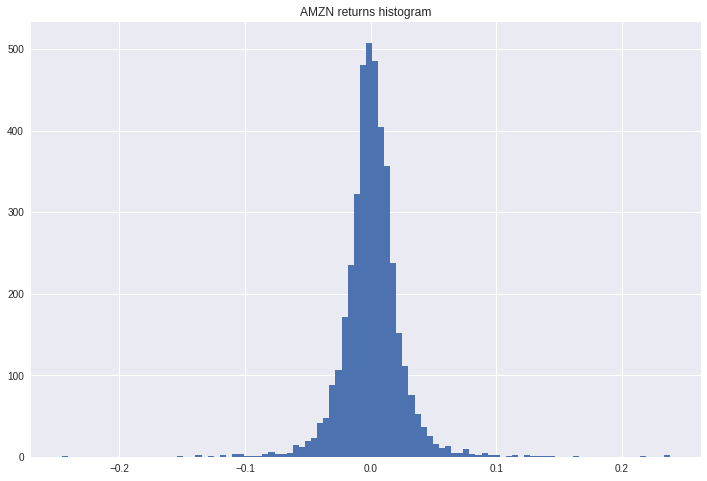

In [ ]:
df.returns.hist(bins = 100, figsize = (12, 8))
plt.title("AMZN returns histogram")
plt.show()

In [ ]:
df.returns.sum()

4.209088352204117

In [ ]:
np.exp(df.returns.sum())

67.29516235062412

In [ ]:
df.AMZN[-1] / df.AMZN[0]

67.77029759575325

In [ ]:
df.returns.cumsum().apply(np.exp)

Date
2005-08-30     0.992989
2005-08-31     0.997897
2005-09-01     0.977799
2005-09-02     0.970086
2005-09-06     1.019397
                ...    
2022-01-24    67.559706
2022-01-25    65.429304
2022-01-26    64.908855
2022-01-27    65.266416
2022-01-28    67.295162
Name: returns, Length: 4133, dtype: float64

In [ ]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,AMZN,returns,creturns
Date,,,
2005-08-30,42.490002,-0.007036,0.992989
2005-08-31,42.700001,0.004930,0.997897
2005-09-01,41.840000,-0.020346,0.977799
2005-09-02,41.509998,-0.007919,0.970086
2005-09-06,43.619999,0.049581,1.019397
...,...,...,...
2022-01-24,2890.879883,0.013239,67.559706
2022-01-25,2799.719971,-0.032042,65.429304
2022-01-26,2777.449951,-0.007986,64.908855


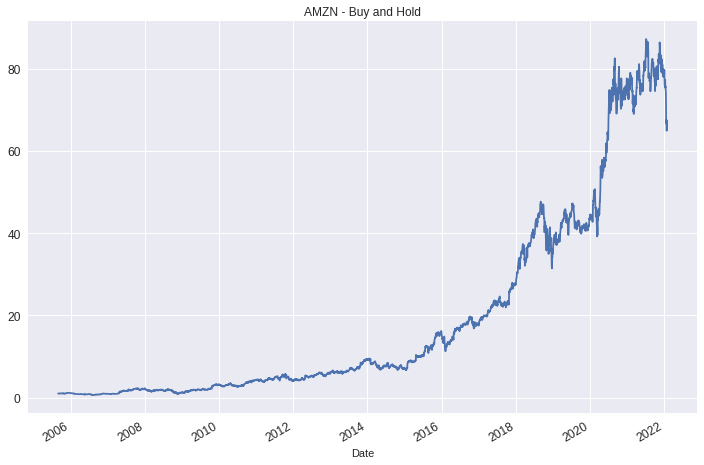

In [ ]:
df.creturns.plot(figsize = (12, 8), title = "AMZN - Buy and Hold", fontsize = 12)
plt.show()

#Performance Metrics

In [ ]:
df

,AMZN,returns,creturns
Date,,,
2005-08-30,42.490002,-0.007036,0.992989
2005-08-31,42.700001,0.004930,0.997897
2005-09-01,41.840000,-0.020346,0.977799
2005-09-02,41.509998,-0.007919,0.970086
2005-09-06,43.619999,0.049581,1.019397
...,...,...,...
2022-01-24,2890.879883,0.013239,67.559706
2022-01-25,2799.719971,-0.032042,65.429304
2022-01-26,2777.449951,-0.007986,64.908855


In [ ]:
df.creturns.iloc[-1] # absolute Performance 

67.29516235062454

In [ ]:
df.returns.sum() # absolute Performance

4.209088352204117

In [ ]:
df.describe()

,AMZN,returns,creturns
count,4133.000000,4133.000000,4133.000000
mean,810.762141,0.001018,18.947467
std,1006.863314,0.023665,23.530341
min,26.070000,-0.246182,0.609254
25%,94.830002,-0.009564,2.216172
50%,305.109985,0.000755,7.130404
75%,1182.260010,0.012146,27.629352
max,3731.409912,0.238621,87.202847


**annualized mean return and risk**

In [ ]:
df.returns.mean() * 252 # mean return

0.25663930915931266

In [ ]:
df.returns.std() * np.sqrt(252) # risk

0.37567434005481926

**maximum drawdown**

In [ ]:
df["cummax"] = df.creturns.cummax()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,AMZN,returns,creturns,cummax
Date,,,,
2005-08-30,42.490002,-0.007036,0.992989,0.992989
2005-08-31,42.700001,0.004930,0.997897,0.997897
2005-09-01,41.840000,-0.020346,0.977799,0.997897
2005-09-02,41.509998,-0.007919,0.970086,0.997897
2005-09-06,43.619999,0.049581,1.019397,1.019397
...,...,...,...,...
2022-01-24,2890.879883,0.013239,67.559706,87.202847
2022-01-25,2799.719971,-0.032042,65.429304,87.202847
2022-01-26,2777.449951,-0.007986,64.908855,87.202847


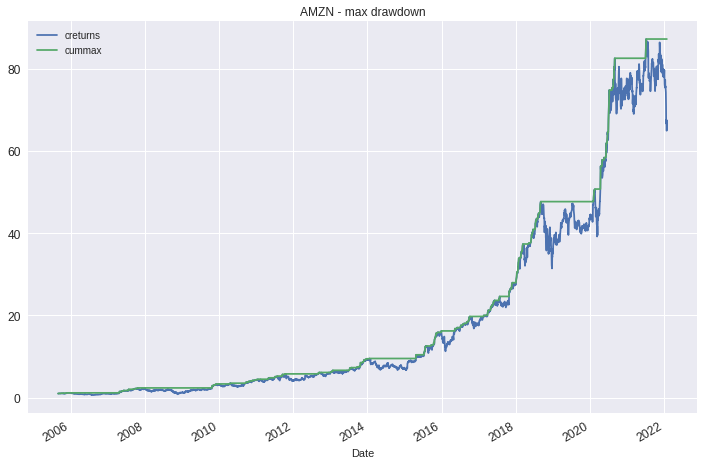

In [ ]:
df[["creturns", "cummax"]].dropna().plot(figsize = (12, 8), title = "AMZN - max drawdown", fontsize = 12)
plt.show()

In [ ]:
drawdown = df["cummax"] - df["creturns"]
drawdown

Date
2005-08-30     0.000000
2005-08-31     0.000000
2005-09-01     0.020098
2005-09-02     0.027810
2005-09-06     0.000000
                ...    
2022-01-24    19.643141
2022-01-25    21.773543
2022-01-26    22.293993
2022-01-27    21.936431
2022-01-28    19.907685
Length: 4133, dtype: float64

In [ ]:
drawdown.max() # maximum drawdown

22.29399253392721

In [ ]:
drawdown.idxmax()

Timestamp('2022-01-26 00:00:00')

#Simple Moving Average


In [ ]:
df = cl_price.iloc[: , :1]
df

,AMZN
Date,
2005-08-29,42.790001
2005-08-30,42.490002
2005-08-31,42.700001
2005-09-01,41.840000
2005-09-02,41.509998
...,...
2022-01-24,2890.879883
2022-01-25,2799.719971
2022-01-26,2777.449951


In [ ]:
sma_s = 50
sma_l = 200

In [ ]:
df.AMZN.rolling(50).mean().tail()

Date
2022-01-24    3388.855215
2022-01-25    3375.399614
2022-01-26    3360.445615
2022-01-27    3345.387017
2022-01-28    3332.164219
Name: AMZN, dtype: float64

In [ ]:
df["SMA_S"] = df.AMZN.rolling(sma_s).mean()
df["SMA_L"] = df.AMZN.rolling(sma_l).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df

,AMZN,SMA_S,SMA_L
Date,,,
2005-08-29,42.790001,NaN,NaN
2005-08-30,42.490002,NaN,NaN
2005-08-31,42.700001,NaN,NaN
2005-09-01,41.840000,NaN,NaN
2005-09-02,41.509998,NaN,NaN
...,...,...,...
2022-01-24,2890.879883,3388.855215,3388.293704
2022-01-25,2799.719971,3375.399614,3385.395354
2022-01-26,2777.449951,3360.445615,3382.282604


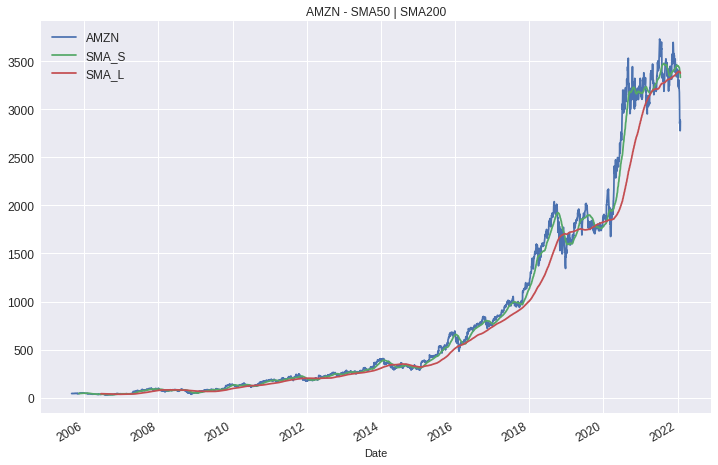

In [ ]:
df.plot(figsize = (12, 8), title = "AMZN - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
df.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,AMZN,SMA_S,SMA_L
Date,,,
2006-06-14,33.680000,34.868400,40.849200
2006-06-15,34.959999,34.832200,40.810050
2006-06-16,35.090000,34.787200,40.773050
2006-06-19,35.070000,34.718400,40.734900
2006-06-20,35.480000,34.686200,40.703100
...,...,...,...
2022-01-24,2890.879883,3388.855215,3388.293704
2022-01-25,2799.719971,3375.399614,3385.395354
2022-01-26,2777.449951,3360.445615,3382.282604


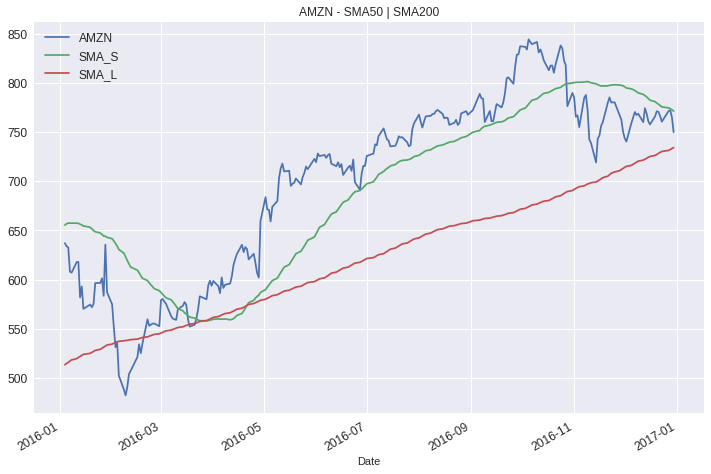

In [ ]:
df.loc["2016"].plot(figsize = (12, 8), title = "AMZN - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
df["position"] = np.where(df["SMA_S"] > df["SMA_L"], 1, -1 )
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,AMZN,SMA_S,SMA_L,position
Date,,,,
2006-06-14,33.680000,34.868400,40.849200,-1
2006-06-15,34.959999,34.832200,40.810050,-1
2006-06-16,35.090000,34.787200,40.773050,-1
2006-06-19,35.070000,34.718400,40.734900,-1
2006-06-20,35.480000,34.686200,40.703100,-1
...,...,...,...,...
2022-01-24,2890.879883,3388.855215,3388.293704,1
2022-01-25,2799.719971,3375.399614,3385.395354,-1
2022-01-26,2777.449951,3360.445615,3382.282604,-1


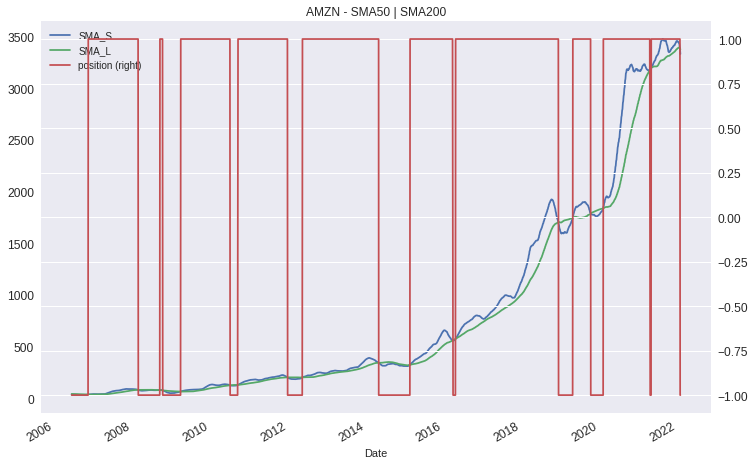

In [ ]:
df.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                title = "AMZN - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

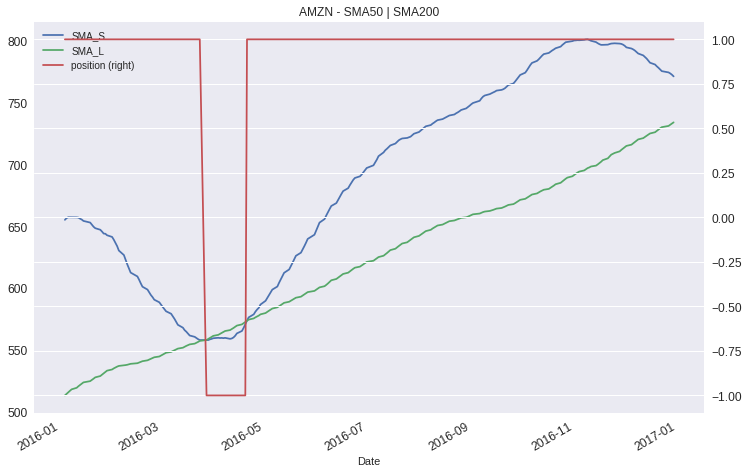

In [ ]:
df.loc["2016", ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                     title = "AMZN - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

**Quantifying the returns**

In [ ]:
df

,AMZN,SMA_S,SMA_L,position
Date,,,,
2006-06-14,33.680000,34.868400,40.849200,-1
2006-06-15,34.959999,34.832200,40.810050,-1
2006-06-16,35.090000,34.787200,40.773050,-1
2006-06-19,35.070000,34.718400,40.734900,-1
2006-06-20,35.480000,34.686200,40.703100,-1
...,...,...,...,...
2022-01-24,2890.879883,3388.855215,3388.293704,1
2022-01-25,2799.719971,3375.399614,3385.395354,-1
2022-01-26,2777.449951,3360.445615,3382.282604,-1


In [ ]:
df["returns"] = np.log(df.AMZN.div(df.AMZN.shift(1)))
df["strategy"] = df.position.shift(1) * df["returns"]
df.dropna(inplace = True)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,AMZN,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2006-06-15,34.959999,34.832200,40.810050,-1,0.037300,-0.037300
2006-06-16,35.090000,34.787200,40.773050,-1,0.003712,-0.003712
2006-06-19,35.070000,34.718400,40.734900,-1,-0.000570,0.000570
2006-06-20,35.480000,34.686200,40.703100,-1,0.011623,-0.011623
2006-06-21,36.650002,34.687000,40.678800,-1,0.032444,-0.032444
...,...,...,...,...,...,...
2022-01-24,2890.879883,3388.855215,3388.293704,1,0.013239,0.013239
2022-01-25,2799.719971,3375.399614,3385.395354,-1,-0.032042,-0.032042
2022-01-26,2777.449951,3360.445615,3382.282604,-1,-0.007986,0.007986


In [ ]:
df[["returns", "strategy"]].sum() # absolute performance

returns     4.448489
strategy    0.836515
dtype: float64

In [ ]:
df[["returns", "strategy"]].sum().apply(np.exp) # absolute performance

returns     85.497626
strategy     2.308309
dtype: float64

In [ ]:
df[["returns", "strategy"]].mean() * 252 # annualized return

returns     0.284957
strategy    0.053585
dtype: float64

In [ ]:
df[["returns", "strategy"]].std() * np.sqrt(252) # annualized risk

returns     0.377693
strategy    0.378104
dtype: float64

In [ ]:
df["creturns"] = df["returns"].cumsum().apply(np.exp)
df["cstrategy"] = df["strategy"].cumsum().apply(np.exp)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,AMZN,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2006-06-15,34.959999,34.832200,40.810050,-1,0.037300,-0.037300,1.038005,0.963387
2006-06-16,35.090000,34.787200,40.773050,-1,0.003712,-0.003712,1.041865,0.959818
2006-06-19,35.070000,34.718400,40.734900,-1,-0.000570,0.000570,1.041271,0.960365
2006-06-20,35.480000,34.686200,40.703100,-1,0.011623,-0.011623,1.053444,0.949267
2006-06-21,36.650002,34.687000,40.678800,-1,0.032444,-0.032444,1.088183,0.918963
...,...,...,...,...,...,...,...,...
2022-01-24,2890.879883,3388.855215,3388.293704,1,0.013239,0.013239,85.833725,2.451439
2022-01-25,2799.719971,3375.399614,3385.395354,-1,-0.032042,-0.032042,83.127077,2.374136
2022-01-26,2777.449951,3360.445615,3382.282604,-1,-0.007986,0.007986,82.465853,2.393172


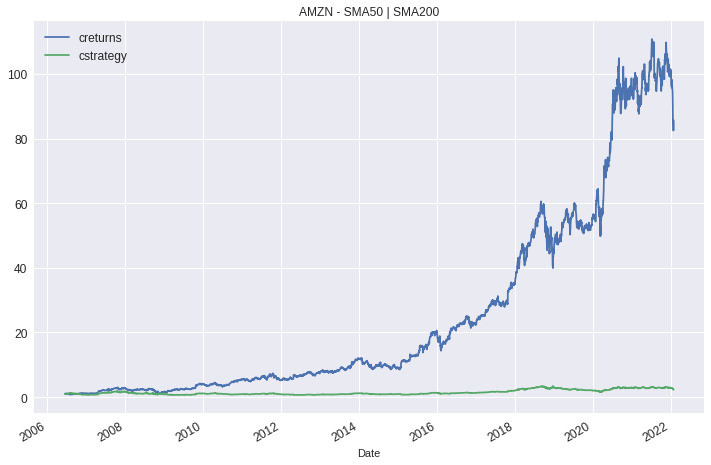

In [ ]:
df[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "AMZN - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
outperf = df.cstrategy.iloc[-1] - df.creturns.iloc[-1]
outperf

-83.18931623461825

#Optimizing SMA

In [ ]:
df = cl_price.iloc[: , :1]
df

,AMZN
Date,
2005-08-29,42.790001
2005-08-30,42.490002
2005-08-31,42.700001
2005-09-01,41.840000
2005-09-02,41.509998
...,...
2022-01-24,2890.879883
2022-01-25,2799.719971
2022-01-26,2777.449951


In [ ]:
def test_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.AMZN.div(data.AMZN.shift(1)))
    data["SMA_S"] = data.AMZN.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.AMZN.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return np.exp(data["strategy"].sum())

In [ ]:
test_strategy((50, 200))

2.3083094334918455

In [ ]:
test_strategy((75, 150))

2.009963312940639

In [ ]:
test_strategy((25, 252))

5.03072787402078

In [ ]:
SMA_S_range = range(10, 50, 1)
SMA_L_range = range(100, 252, 1)

In [ ]:
SMA_S_range

range(10, 50)

In [ ]:
from itertools import product

In [ ]:
list(product(SMA_S_range, SMA_L_range))

In [ ]:
combinations = list(product(SMA_S_range, SMA_L_range))

In [ ]:
len(combinations)

6080

In [ ]:
(50-10) * (252-100)

6080

In [ ]:
results = []
for comb in combinations:
    results.append(test_strategy(comb))

In [ ]:
results

In [ ]:
np.max(results)

19.35939325976673

In [ ]:
np.argmax(results)

1496

In [ ]:
combinations[np.argmax(results)]

(19, 228)

In [ ]:
many_results = pd.DataFrame(data = combinations, columns = ["SMA_S", "SMA_L"])
many_results

In [ ]:
many_results["performance"] = results

In [ ]:
many_results.nlargest(10, "performance")

,SMA_S,SMA_L,performance
1496,19,228,19.359393
1911,22,187,19.038226
2530,26,198,18.401311
1913,22,189,18.258225
2223,24,195,17.968540
2531,26,199,17.887189
2222,24,194,17.724799
2066,23,190,17.717484
1912,22,188,17.544498
1796,21,224,17.342450


In [ ]:
many_results.nsmallest(10, "performance")

,SMA_S,SMA_L,performance
5948,49,120,1.016112
5947,49,119,1.032863
5796,48,120,1.102092
5795,48,119,1.119591
5833,48,157,1.249458
5834,48,158,1.260027
5797,48,121,1.281586
5946,49,118,1.308127
5949,49,121,1.311528
2738,28,102,1.327457
